# INTERPOLAÇÃO E AJUSTE DE CURVAS


Interpolação e ajuste de curvas, são importantes recursos na vida de qualquer Cientista. A necessidade de encontrar a função que determina um conjunto de dados ou o valor entre dois pontos, é algo bastante comum na vida de um pesquisador. 

## INTERPOLAÇÃO

Interpolação é o método que permite construir um novo conjunto de dados a partir de um conjunto discreto de dados pontuais previamente conhecidos (Wikipedia). A interpolação serve para determinar a corrspondência $x_{interp} -> y_{interp}$ entre dois pontos $A(x_1,y_1)~ e~ B(x_2,y_2)$ conhecidos.

Dado um conjunto de dados X e Y

In [2]:
x = [0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0  8.0 9.0 10.0];
y = [0.0 0.5 4.3 7.0 8.0 6.0 6.9 10.0 9.0 9.5 8.2 ];

In [21]:
using Winston

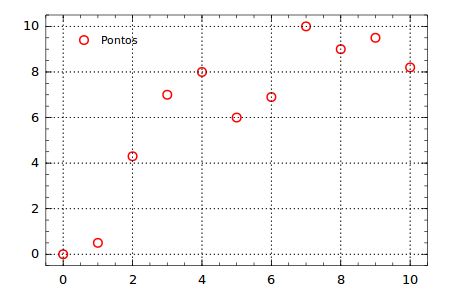

In [22]:
Winston.plot(x,y,"or")
Winston.legend(["Pontos"])
Winston.grid()

### PACOTE INTERPOLATIONS

A função interpolate do pacote Interpolations implementa vários métodos para realizar interpolação entre pontos, são eles:
* **Linear**: 
* **Constant**:
* 

A função interpolate usa vetores unidimensionais do tipo Array{Tipo_dado,**1**}. Caso use vetor linha(bidimensional), há a necessidade de usar o comando **vec(dado)**. Sintaxe:
```julia
funcao_interp = interpolate((x_dados,), y_dados, Gridded(Metodo())); 
```
* **x_dados**: vetor unidimensional (Array{Tipo_dado,**1**}) de dados iniciais do eixo "x";
* **y_dados**: vetor unidimensional (Array{Tipo_dado,**1**}) de dados iniciais do eito "y";
* **Metodo**: método a ser utilizado (linear, spline..).

Para instalar use: Pkg.add("Interpolations")

In [5]:
using Interpolations

In [139]:
xx = vec(x); yy = vec(y); x_interp = 0:0.1:10;

In [7]:
# CUIDADO: VEJA QUE NO COMANDO interpolate((xx,)... TEMOS XX E VIRGULA

y_interp_lin = interpolate((xx,), yy, Gridded(Linear())); 

In [8]:
typeof(y_interp_lin)

Interpolations.GriddedInterpolation{Float64,1,Float64,Interpolations.Gridded{Interpolations.Linear},Tuple{Array{Float64,1}},0}

In [9]:
# testando a função interpolação linear para x_interp = 2.3

y_interp_lin[2.3]

5.109999999999999

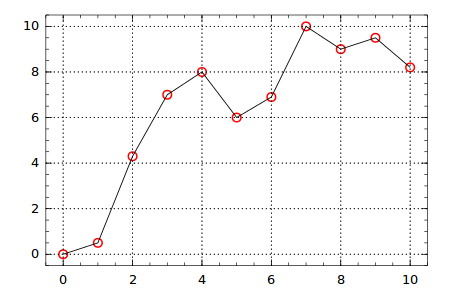

In [10]:
using Winston

Winston.plot(x,y,"or", x_interp, y_interp_lin[x_interp])
Winston.grid()

* **Interpolação Constant**

In [11]:
y_interp_con = interpolate((xx,), yy, Gridded(Constant())); 

In [12]:
# testando a função interpolação linear para x_interp = 2.3

y_interp_con[2.3]

4.3

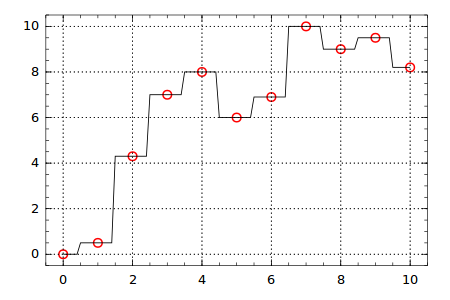

In [13]:
using Winston

Winston.plot(x,y,"or", x_interp, y_interp_con[x_interp])
Winston.grid()

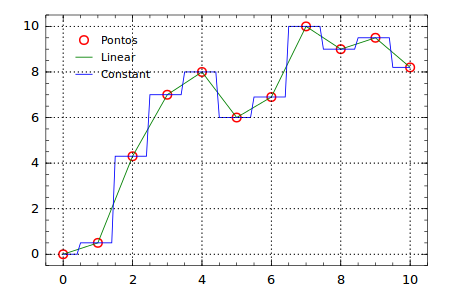

In [20]:
using Winston

Winston.plot(
x,y,"or", 
x_interp, y_interp_lin[x_interp],"g",
x_interp, y_interp_con[x_interp],"b"
)

Winston.legend(["Pontos"; "Linear";"Constant"])
Winston.grid()

### PACOTE NUMERICALMATH

A função **interp1d** do pacote NumericalMath implementa vários métodos para realizar interpolação entre pontos, são eles:
* **Constant**:  
* **Linear**  :
* **Spline**  : Não funciona
* **Nearest** :
* **Cubic**   :
* **Pchip**   : == cubic

A função NumericalMath usa vetores unidimensionais do tipo Array{Tipo_dado,**1**}. Caso use vetor linha(bidimensional), há a necessidade de usar o comando **vec(dado)**
Sintaxe:
```julia
interp1d(x_dados,y_dados,x_dados_interp,method=:metodo)
```
* **x_dados**: vetor unidimensional(Array{Tipo_dado,1} de dados iniciais do eixo "x";
* **y_dados**: vetor unidimensional(Array{Tipo_dado,1} de dados iniciais do eito "y";
* **x_dados_interp**: vetor unidimensional(Array{Tipo_dado,1}) utilizado para interpolar os pontos ;
* **method**: método a ser utilizado (linear, spline..).

Se não estiver instalado, use:Pkg.clone("https://github.com/hwborchers/NumericalMath.jl")

In [149]:
x = [0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0  8.0 9.0 10.0];
y = [0.0 0.5 4.3 7.0 8.0 6.0 6.9 10.0 9.0 9.5 8.2 ];

In [150]:
using NumericalMath 

In [151]:
# corrigindo os vetores para vetores unidimensionais e
# definindo o vetor x_interp 

xx = vec(x); yy = vec(y); x_interp = collect(0:0.1:10);

* **Interpolação Cubica**

In [152]:
y_interp_cub(x_interp) = interp1d(xx,yy,x_interp,method=:cubic)

y_interp_cub (generic function with 1 method)

In [153]:
# Testando interpolação cubica para valor 2.3 
# Use valores float, se usar inteiro ocorre erro

y_interp_cub(2.3)

5.255321746361746

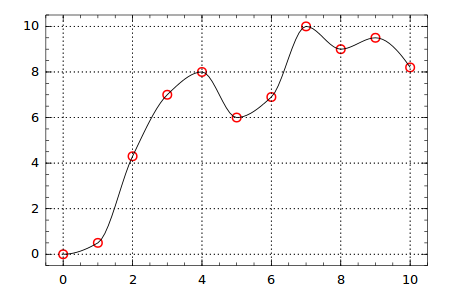

In [155]:
using Winston

Winston.plot(x,y,"or", x_interp, y_interp_cub(x_interp) )
Winston.grid()

* **Interpolação Constant**

In [156]:
y_interp_cons(x_interp) = interp1d(xx,yy,x_interp,method=:constant)

y_interp_cons (generic function with 1 method)

In [157]:
# Testando interpolação constant para valor 2.3 
# Use valores float, se usar inteiro ocorre erro

y_interp_cons(2.3)

4.3

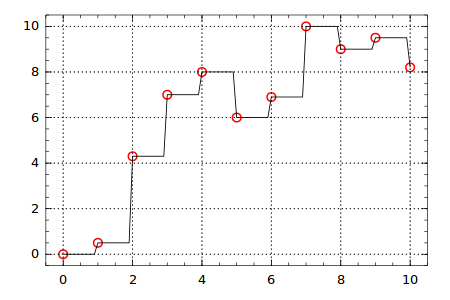

In [158]:
using Winston

Winston.plot(x,y,"or",x_interp,y_interp_cons(x_interp) )
Winston.grid()

* **Interpolação Linear**

In [184]:
y_interp_line(x_interp) = interp1d(xx,yy,x_interp,method=:linear)

y_interp_line (generic function with 1 method)

In [185]:
# Testando interpolação linear para valor 2.3 
# Use valores float, se usar inteiro ocorre erro

y_interp_line(2.3)

5.109999999999999

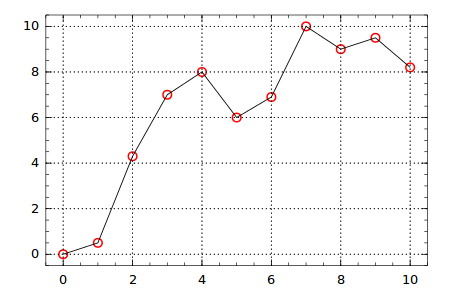

In [186]:
using Winston

Winston.plot(x,y,"or", x_interp,y_interp_line(x_interp) )
Winston.grid()

* **Interpolação Nearest**

In [187]:
y_interp_nea(x_interp) = interp1d(xx,yy,x_interp,method=:nearest)

y_interp_nea (generic function with 1 method)

In [188]:
# Testando interpolação nearest para valor 2.3 
# Use valores float, se usar inteiro ocorre erro

y_interp_nea(2.3)

4.3

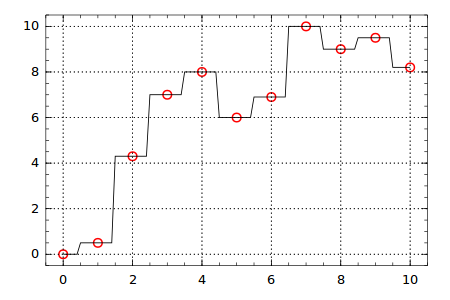

In [189]:
using Winston

Winston.plot(x,y,"or", x_interp,y_interp_nea(x_interp) )
Winston.grid()

* **Interpolação Pchip**

In [190]:
y_interp_pch(x_interp) = pchip(xx,yy,x_interp)

y_interp_pch (generic function with 1 method)

In [191]:
# Testando interpolação pchip para valor 2.3.
# Use valores float, se usar inteiro ocorre erro

y_interp_pch(2.3)

5.255321746361746

**Detalhe importante**. Neste caso não funciona a forma:
```julia
Winston.plot(x,y,"or", x_interp, y_interp_ch(x_interp))
```
Isto ocorre devido a formulação da função pelo comando **pchip**. Só é possível atribuir diretamente um vetor à uma função se for utilizado { .*}   e  {.^} na formulação da função.

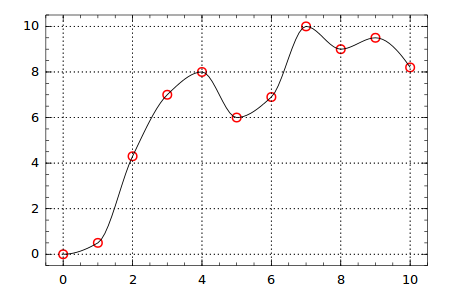

In [192]:
using Winston

Winston.plot(x,y,"or", x_interp, map(y_interp_pch,x_interp))
Winston.grid()

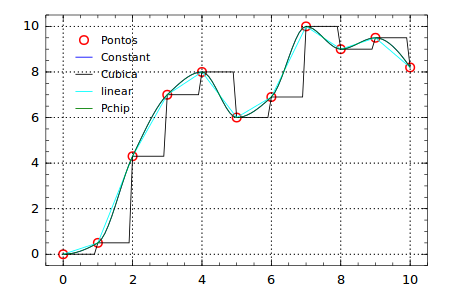

In [193]:
using Winston

Winston.plot(
x,y,"or", 
x_interp,y_interp_cub(x_interp),"b",
x_interp,y_interp_cons(x_interp),"bk",
x_interp,y_interp_line(x_interp),"c",
x_interp,map(y_interp_pch,x_interp),"g",
)
legend(["Pontos","Constant", "Cubica","linear","Pchip"])
Winston.grid()

### COMO ESCOLHER O MELHOR PACOTE PARA INTERPOLAÇÃO?

## AJUSTE DE CURVAS

Ajuste de Curvas é um método que consiste em encontrar uma curva que se ajuste a uma série de pontos e que possivelmente cumpra uma série de parâmetros adicionais. Ajuste de curvas pode envolver tanto interpolação, onde é necessário um ajuste exato aos dados, quanto suavização, na qual é construída uma função "suave" que aproximadamente se ajusta aos dados. Outro assunto relacionado é análise de regressão, a qual se foca mais em questões da inferência estatística. O ajuste de curvas é muito utilizado para, a partir de dados conhecidos, fazer-se extrapolações. Conhecida a equação da curva, pode-se determinar valores fora do intervalo conhecido. Fonte: wikipedia.

Pacotes importantes:
* **LsqFit**: O pacote LsqFit é uma pequena biblioteca que fornece alguns métodos de mínimos quadrados que podem ser aplicados de forma geral a um grande número de funções. A função LsqFif fornece dados sobre erros, jacobiano da solução e outros.


* **CurveFit**: O pacote CurveFit fornece funções que implementam alguns métodos dos mínimos quadrados e apresenta implementação simples para os ajustes linear e polinomial. A função CurveFit simplesmente retorna os coeficientes dos modelos e não faz qualquer análise erro. 

### LINEAR SIMPLES

In [66]:
using DataFrames

In [67]:
tabela_dados_reta = DataFrames.readtable("dados_reta.csv");

In [68]:
# atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_reta

x = Array(tabela_dados_reta[1]); 
y = Array(tabela_dados_reta[2]);

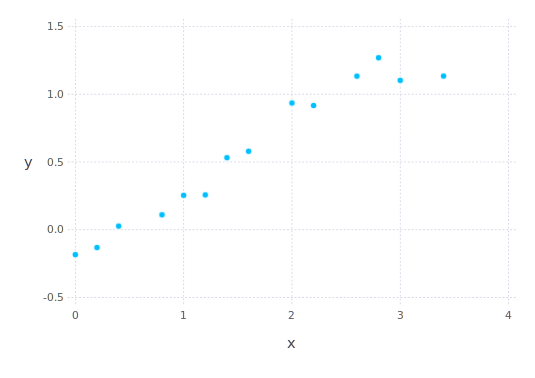

In [69]:
using Gadfly

Gadfly.plot(x=x,y=y)

De acordo com o gráfico, podemos identificar que os pontos determinam o modelo de uma reta. A função linear utilizada como modelo será na forma:

$$ modelo = a_1*x + a_2 $$

#### COMANDO LINREG()

Para realizar uma regressão linear simples a fim de obter os coeficientes "a" e "b" da função $y = ax + b$, use:
```julia
coeficientes = linreg(x_dados,y_dados)
```
* **x_dados**:
* **y_dados**:

In [70]:
coef = linreg(x,y)

2-element Array{Float64,1}:
 -0.175732
  0.459962

In [71]:
ajuste_linear(x) = coef[2]*x + coef[1];

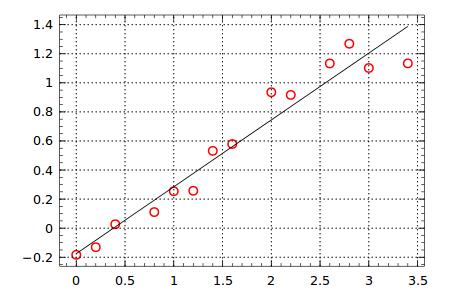

In [72]:
using Winston

Winston.plot(x,y,"or",x, ajuste_linear(x))
Winston.grid()

#### PACOTE LSQFIT

Sintaxe:
```julia
vetor_dados_ajuste = LsqFit.curve_fit(modelo_ajuste, x_dados, y_dados, [a_1, a_2])
```
* **x_dados**:
* **y_dados**:
* **modelo_ajuste**:
* **a_1 e a_2**:
* **vetor_dados_ajuste** :

Para instalar, use: Pkg.add("LsqFit")

In [73]:
using LsqFit

# Vetor "a" determina os coef iniciais da reta 
modelo_reta_lsqfit(x, a) = a[1]*x + a[2]

# valores iniciais dos coeficientes é o vetor coluna [0.5, 0.5]

reta = LsqFit.curve_fit(modelo_reta_lsqfit, x, y, [0.5, 0.5])

# reta.param: coefientes da curva
# (OPCIONAL) reta.dof: graus de liberdade
# (OPCIONAL) reta.resid: vetor de residuos de erro
# (OPCIONAL) reta.jacobian: Jacobiano Estimado

# (OPCIONAL) estimativa de erro dos coeficientes. 0.95 é 95% de confiança:
erros = estimate_errors(reta, 0.95);

In [74]:
# atualizando o vetor "a". Veja os coeficientes da curva

a = reta.param

2-element Array{Float64,1}:
  0.459962
 -0.175732

In [75]:
# atualizando o modelo com os dados do vetor "a"

modelo_reta_lsqfit(x, a) = a[1]*x + a[2]

modelo_reta_lsqfit (generic function with 1 method)

In [76]:
# testando o modelo de ajuste para x = 0

modelo_reta_lsqfit(0, a)

-0.1757321724961883

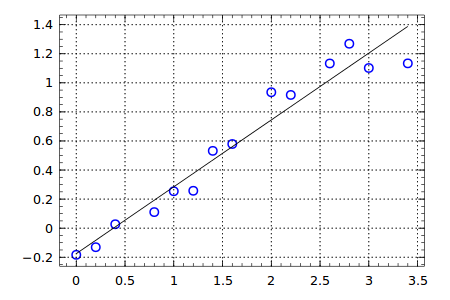

In [77]:
using Winston

Winston.plot(x, y, "ob",x,modelo_reta_lsqfit(x,a))
Winston.grid()

O "modelo" reta, é um polinômio na forma de vetor contendo o valor de a = 0.45996 e b= -0.17573

#### PACOTE CURVEFIT

Sintaxe:
```julia
Funcao_modelo = CurveFit.curve_fit(CurveFit.LinearFit, x_dados, y_dados)
```
* **x_dados**:
* **y_dados**:
* **CurveFit.LinearFit**:
* **Funcao_modelo**:

Se tiver instalado use: Pkg.add("CurveFit")

In [78]:
using CurveFit

In [79]:
modelo_reta_curvefit = CurveFit.curve_fit(CurveFit.LinearFit, x, y)

CurveFit.LinearFit{Float64}([-0.17573217249621112,0.4599622661497015])

In [80]:
# testando o modelo de ajuste para x = 1

modelo_reta_curvefit(1)

0.2842300936534904

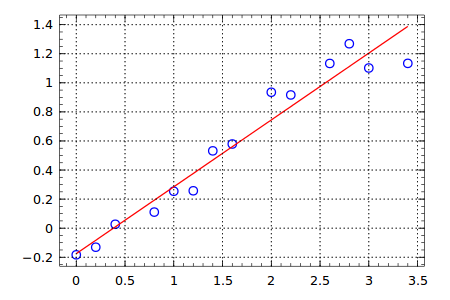

In [81]:
using Winston

Winston.plot(x, y, "ob", x, modelo_reta_curvefit(x), "r-", linewidth=3)
Winston.grid()

** Juntando todos os plots **

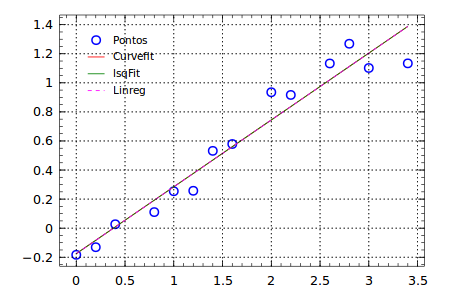

In [82]:
Winston.plot(
x, y, "ob", x, modelo_reta_curvefit(x), "r-",
x, modelo_reta_lsqfit(x,a),"g-" ,
x, ajuste_linear(x),"--m"
)
Winston.legend(["Pontos","Curvefit","lsqFit","Linreg"])
Winston.grid()

### POLINOMIAL (grau > 1) ###

ATENÇÃO! É importante resetar as variaveis antes de usar os outros modelos de ajuste de curvas, pois as constantes a,b,c são as mesmas em todos os modelos

In [83]:
using DataFrames

In [84]:
tabela_dados_parabola = readtable("dados_parabola.csv");

In [85]:
# atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_parabola

x = Array(tabela_dados_parabola[1]); 
y = Array(tabela_dados_parabola[2]);

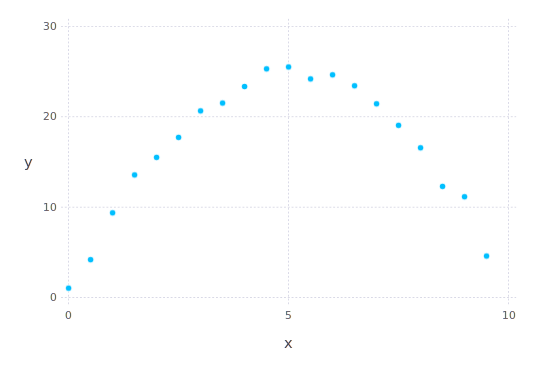

In [86]:
using Gadfly

Gadfly.plot(x=x,y=y)

De acordo com o gráfico, podemos identificar que os pontos determinam o modelo de uma curva polinomial(parábola). A função polinomial utilizada como modelo será na forma:

$$ modelo = a_1*x^2 + a_2*x + a_3$$

#### PACOTE LSQFIT

Sintaxe:
```julia
vetor_dados_ajuste :LsqFit.curve_fit(modelo_ajuste, x_dados, y_dados, [a_1, a_2, a_3])
```
* **x_dados**:
* **y_dados**:
* **modelo_ajuste**:
* **a_1 , a_2 , a_3**:
* **vetor_dados_ajuste** :

In [87]:
using LsqFit

# Vetor "a" determina os coef iniciais da curva 
modelo_curva_lsqfit(x, a) = a[1]*x.^2 + a[2]*x + a[3]

# valores iniciais dos coeficientes é o vetor coluna [-0.5, 0.5, 0.5]

curva = LsqFit.curve_fit(modelo_curva_lsqfit, x, y, [0.5, 0.5, 0.5])

# curva.param: coefientes da curva
# (OPCIONAL) curva.dof: graus de liberdade
# (OPCIONAL) curva.resid: vetor de residuos de erro
# (OPCIONAL) curva.jacobian: Jacobiano Estimado

# (OPCIONAL) estimativa de erro dos coeficientes. 0.95 é 95% de confiança:
erros = estimate_errors(curva, 0.95);

In [88]:
# atualizando o vetor "a". Veja os coeficientes da curva
a = curva.param

3-element Array{Float64,1}:
 -0.967694
  9.76314 
  0.259157

In [89]:
# atualizando o modelo com os dados do vetor "a"

modelo_curva_lsqfit(x, a) = a[1]*x.^2 + a[2]*x + a[3]

modelo_curva_lsqfit (generic function with 1 method)

O "modelo_curva_lsqfit", é um polinômio na forma de vetor contendo o valor de a = -0.96769 , b= 9.76314 e c = 0.25916

In [90]:
# testando o modelo de ajuste para x = 0

modelo_curva_lsqfit(0, a)

0.2591565191242925

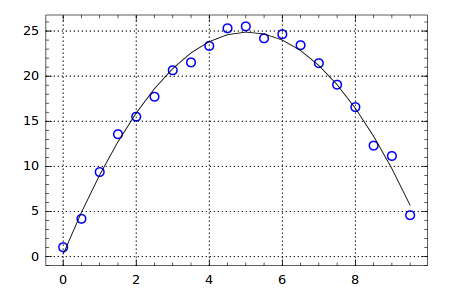

In [91]:
using Winston

#plotando o gráfico: a função modelo receberá os dados do vetor de dados "x" 
# e sustituirá a variável "Xm" pelos valores de "x"

Winston.plot(x, y, "ob", x , modelo_curva_lsqfit(x, a))
Winston.grid()

#### PACOTE CURVEFIT

Sintaxe:
```julia
Funcao_Modelo = CurveFit.curve_fit(CurveFit.Poly, x_dados, y_dados,grau)
```
* **x_dados**:
* **y_dados**:
* **CurveFit.LinearFit**:
* **Grau**:

In [92]:
using CurveFit

In [93]:
modelo_curva_curvefit = CurveFit.curve_fit(CurveFit.Poly, x, y,2)

Poly(0.2591565192254493 + 9.7631398653728x - 0.9676935282328346x^2)

O "modelo_curva_curvefit", é um polinômio na forma de vetor contendo o valor de a = -0.96769 , b= 9.76314 e c = 0.25916. 

A função CurveFit.Poly é bem versátil e pode ser utilizada para calcular ajuste linear, basta usar grau = 1.

In [94]:
# testando o modelo de ajuste para x = 0

modelo_curva_curvefit(0)

0.2591565192254493

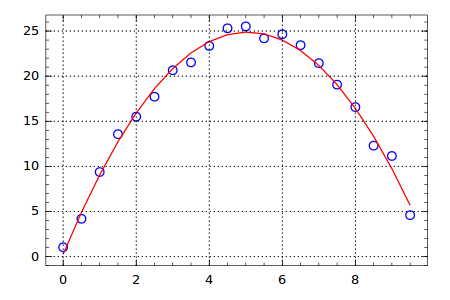

In [95]:
using Winston

Winston.plot(x, y, "ob", x, modelo_curva_curvefit(x), "r-", linewidth=3)
Winston.grid()

** Juntando todos os plots **

O ajuste do pacote curvefit e do pacote lsqfit concordam entre si, enquanto o ajuste do modelo caseira diverge

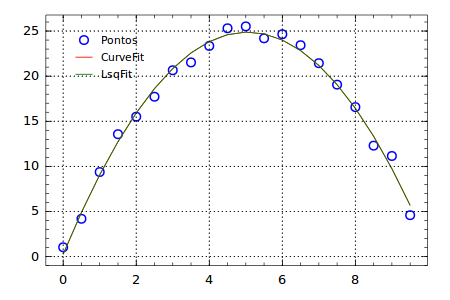

In [96]:
Winston.plot(
x, y, "ob", 
x, modelo_curva_curvefit(x) , "r-",
x, modelo_curva_lsqfit(x,a),"g-"
)

Winston.legend(["Pontos"; "CurveFit"; "LsqFit"])
Winston.grid()

### NÃO POLINOMIAL 

Modelos de ajuste de curvas:

![](funcoes-ajustes-curvas.png)

ATENÇÃO! É importante resetar as variaveis antes de usar os outros modelos de ajuste de curvas, pois as constantes a,b,c são as mesmas em todos os modelos

In [97]:
using DataFrames

tabela_dados_senoide = readtable("dados_senoide.csv");

In [98]:
# atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_senoide

x = Array(tabela_dados_senoide[1]); 
y = Array(tabela_dados_senoide[2]);

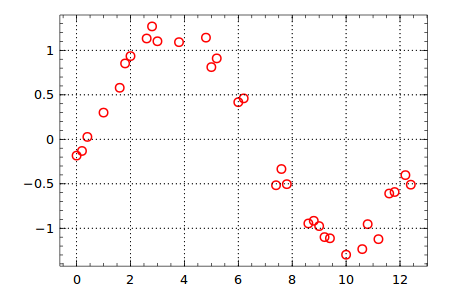

In [99]:
using Winston

Winston.plot(x,y,"or")
Winston.grid()

De acordo com o gráfico, podemos identificar que os pontos determinam o modelo de uma senóide. A função senóide utilizada como modelo será na forma:

$$ modelo = a_1*sin( a_2*x + a_3)$$

#### PACOTE LSQFIT

Sintaxe:
```julia
vetor_dados_ajuste = LsqFit.curve_fit(modelo_ajuste, x_dados, y_dados, [a_1, a_2, a_3])
```
* **x_dados**:
* **y_dados**:
* **modelo_ajuste**:
* **a_1 , a_2 , a_3**:
* **vetor_dados_ajuste** :

In [100]:
using LsqFit

# Vetor "a" determina os coef iniciais do modelo não polinomial
modelo_naopoli_lsqfit(x, a) = a[1]*sin( a[2]*x + a[3] );

# valores iniciais dos coeficientes é o vetor coluna [-0.5, 0.5, 0.5]

naopoli = LsqFit.curve_fit(modelo_naopoli_lsqfit, x, y, [0.5, 0.5, 0.5])

# naopoli.param: coefientes da curva
# (OPCIONAL) naopoli.dof: graus de liberdade
# (OPCIONAL) naopoli.resid: vetor de residuos de erro
# (OPCIONAL) naopoli.jacobian: Jacobiano Estimado

# (OPCIONAL) estimativa de erro dos coeficientes. 0.95 é 95% de confiança:
erros = estimate_errors(naopoli, 0.95);

In [101]:
# atualizando o vetor "a". Veja os coeficientes do modelo não polinomial

a = naopoli.param

3-element Array{Float64,1}:
  1.19211 
  0.494284
 -0.198754

In [102]:
# atualizando o modelo com os dados do vetor "a"

modelo_naopoli_lsqfit(x, a) = a[1]*sin( a[2]*x + a[3] )

modelo_naopoli_lsqfit (generic function with 1 method)

In [103]:
# testando o modelo de ajuste para x = 0

modelo_naopoli_lsqfit(0, a)

-0.23537933974411732

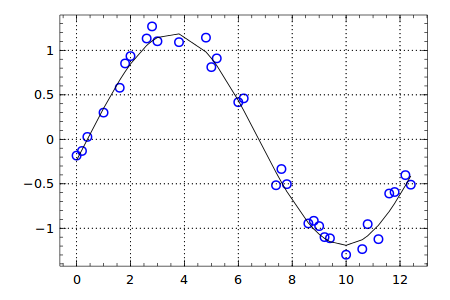

In [104]:
using Winston
Winston.plot(x, y, "ob",x,modelo_naopoli_lsqfit(x, a))
Winston.grid()

#### PACOTE CURVEFIT

Sintaxe:
```julia
coef,converg,iteracoes = CurveFit.nonlinear_fit(xy,modelo,a,eps,maxiter);
```
* **xy**:
* **a** :
* **CurveFit.LinearFit**:
* **Eps**:
* **maxinter**:
* **coef,converg,iteracoes**:

In [105]:
using CurveFit

In [106]:
a = [0.5, 0.5, 0.5]
eps = 0.0000000001
maxiter= 200.0

xy = [x y]

modelo_naopoli_curvefit(xy,a) = xy[2] - a[1]*sin(a[2]*xy[1] + a[3])

coef,converg,iteracoes = CurveFit.nonlinear_fit(xy,modelo_naopoli_curvefit,a,eps,maxiter);

In [107]:
# coeficientes do modelo não polinomial

coef

3-element Array{Float64,1}:
  1.19211 
  0.494284
 -0.198754

In [108]:
# atualizando o modelo

a = coef

modelo_naopoli_curvefit(x,a) =  a[1].*sin(a[2].*x + a[3]);

In [109]:
# testando o modelo de ajuste para x = 0

modelo_naopoli_curvefit(0,a)

-0.23537934615430828

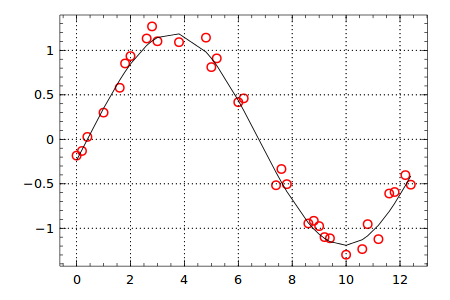

In [110]:
using Winston

Winston.plot(x, y, "or", x , modelo_naopoli_curvefit(x,a))
Winston.grid()

** Juntando todos os plots **

O ajuste do pacote curvefit e do pacote lsqfit concordam entre si

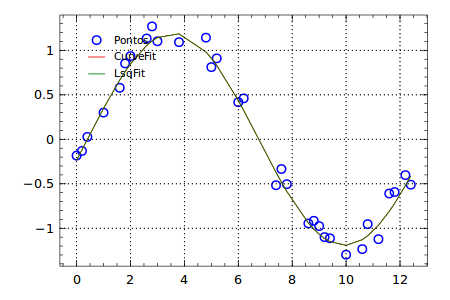

In [111]:
Winston.plot(
x, y, "ob", 
x, modelo_naopoli_curvefit(x,a), "r-",
x, modelo_naopoli_lsqfit(x,a) ,"g-"
)
Winston.legend(["Pontos"; "CurveFit"; "LsqFit"])
Winston.grid()

### COMO ESCOLHER O MELHOR PACOTE PARA AJUSTE DE CURVAS?